# Make GWP figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 90 and 50 Tg/y

In [1]:
filepath= r"./output/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import matplotlib.patches as mpatches
from matplotlib import gridspec
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

## Hydrogen GWP
We read in and plot the GWP values of hydrogen through changes in methane lifetime, changes in ozone concentration both directly from hydrogen reactions and indirectly from methane changes, and changes in stratospheric water vapour, also both from direct production from hydrogen and induced via changes in methane concentrations. Bar plots show how the various contributions contribute to the total GWP value in each of the models.

In [3]:
tittel = 'H2 GWP'
ytittel ='GWP'

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=default_size)

#Defining some colors:
CH4_color = "lightseagreen"
O3_color = "gold"
H2O_color = "darkviolet"
H2_color = 'lightblue'
aerosol_color = 'brown'

#Defining some legend looks:
CH4_legend = mpatches.Patch( facecolor=CH4_color,label='CH4')
O3_dir_legend= mpatches.Patch( facecolor=O3_color, label='O3')
O3_ind_legend= mpatches.Patch( facecolor=O3_color, hatch='\\\\', label='O3 CH4ind')
H2O_dir_legend= mpatches.Patch( facecolor=H2O_color, label='strat H2O')
H2O_ind_legend= mpatches.Patch( facecolor=H2O_color, hatch='\\\\', label='strat H2O CH4ind')


model_dict = { 'GFDL_nudge':'GFDL',
               'OSLOCTM3':'OsloCTM',
               'INCA':'INCA',
               'UKCA':'UKCA',
               'WACCM6-2deg':'WACCM',
               'GFDL-emi':'GFDL-emi',
               'OSLOCTM3-emi':'OsloCTM-emi'
             }

sorted_array = ['GFDL','OsloCTM','INCA','UKCA','WACCM','GFDL-emi','OsloCTM-emi']

In [4]:
df_drydep_max_table_gwp = pd.read_csv(filepath+'drydep_90_table_h2_gwp.csv',index_col=0)
df_drydep_max_table_gwp.rename(columns=model_dict, inplace=True)
df_drydep_min_table_gwp = pd.read_csv(filepath+'drydep_50_table_h2_gwp.csv',index_col=0)
df_drydep_min_table_gwp.rename(columns=model_dict, inplace=True)
df_table_gwp = pd.read_csv(filepath+'table_h2_gwp.csv',index_col=0)
df_table_gwp.rename(columns=model_dict, inplace=True)

In [5]:
df_feedback_factor = pd.read_csv(filepath+'feedback_factor_ch4.csv',index_col=0,header=None)
#Making modellist with shorter names
df_feedback_factor.rename(model_dict, inplace=True)
feedback_factor = df_feedback_factor[1]
feedback_frac = 1.0 - (1.0/feedback_factor)
feedback_frac

0
GFDL-emi       nan
GFDL          0.18
INCA          0.17
OsloCTM       0.24
OsloCTM-emi    nan
UKCA          0.24
WACCM         0.28
Name: 1, dtype: float64

In [6]:
total_drydep_max = df_drydep_max_table_gwp.sum()

total_drydep_min = df_drydep_min_table_gwp.sum()

#Sort indexes
df_table_gwp = df_table_gwp.reindex(['CH4dir','CH4indir', 'O3', 'O3 CH4ind', 'strat H2O', 'strat H2O CH4ind','aerosol','aerosol CH4ind'])

#Sort models alfabetically
#df_table_gwp = df_table_gwp[sorted(df_table_gwp.columns)]
df_table_gwp = df_table_gwp[sorted_array]
df_table_gwp.T

,CH4dir,CH4indir,O3,O3 CH4ind,strat H2O,strat H2O CH4ind,aerosol,aerosol CH4ind
GFDL,4.44,0.96,2.34,2.24,1.80,1.34,-2.49,-0.76
OsloCTM,4.09,1.26,2.44,2.73,1.94,0.67,-0.37,-0.07
INCA,4.45,0.89,1.64,1.47,1.27,0.44,nan,nan
UKCA,3.31,1.03,1.21,1.40,nan,nan,nan,nan
WACCM,4.05,1.59,1.97,3.00,0.58,0.27,nan,nan
GFDL-emi,4.96,nan,4.08,nan,2.94,nan,-2.31,nan
OsloCTM-emi,5.47,nan,2.49,2.80,1.97,0.69,-0.32,nan


In [7]:
#model mean
df_table_gwp_model_mean = df_table_gwp.fillna(0.0)
df_table_gwp_model_mean.loc['CH4'] = df_table_gwp_model_mean.loc['CH4dir']+df_table_gwp_model_mean.loc['CH4indir']
df_table_gwp_model_mean.loc['strat H2O'] = df_table_gwp_model_mean.loc['strat H2O']+df_table_gwp_model_mean.loc['strat H2O CH4ind']
df_table_gwp_model_mean.loc['O3'] = df_table_gwp_model_mean.loc['O3 CH4ind']+df_table_gwp_model_mean.loc['O3']
df_table_gwp_model_mean = df_table_gwp_model_mean.drop(['CH4dir','CH4indir','strat H2O CH4ind','O3 CH4ind'])
df_table_gwp_model_mean.loc['Total'] = df_table_gwp_model_mean.sum()
df_table_gwp_model_mean.replace(0, np.nan, inplace=True)
df_table_gwp_model_mean['Model mean'] = df_table_gwp_model_mean.mean(axis=1)

df_gwp_model_mean = df_table_gwp_model_mean.drop('Total')
df_table_gwp_model_mean
df_gwp_model_mean

,GFDL,OsloCTM,INCA,UKCA,WACCM,GFDL-emi,OsloCTM-emi,Model mean
O3,4.58,5.17,3.11,2.60,4.97,4.08,5.28,4.26
strat H2O,3.14,2.61,1.72,nan,0.84,2.94,2.66,2.32
aerosol,-2.49,-0.37,nan,nan,nan,-2.31,-0.32,-1.37
aerosol CH4ind,-0.76,-0.07,nan,nan,nan,nan,nan,-0.42
CH4,5.40,5.35,5.34,4.35,5.64,4.96,5.47,5.22


O3                4.26
strat H2O         2.32
aerosol          -1.37
aerosol CH4ind   -0.42
CH4               5.22
Name: Model mean, dtype: float64


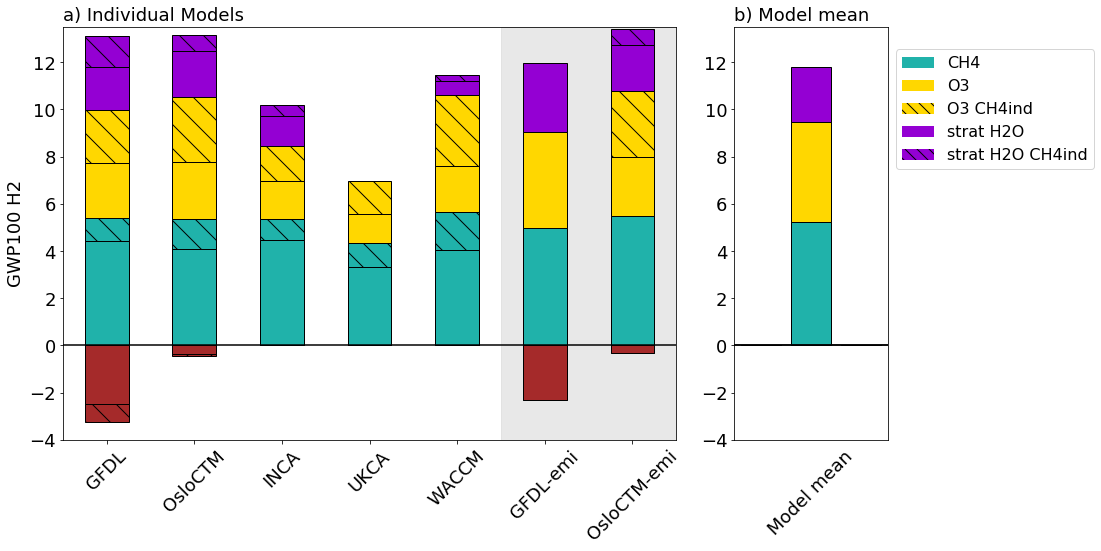

In [8]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(15,8),sharey=True)

gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
axs = plt.subplot(gs[0])

df_table_gwp.T.plot.bar(stacked=True,
                        color=[CH4_color, CH4_color,O3_color, O3_color, H2O_color, H2O_color,aerosol_color,aerosol_color],
                        edgecolor='black',
                        ax=axs, 
                        legend = False) 
"""
for m,model in enumerate(df_table_gwp.columns):
    axs.plot(m,total_drydep_max.loc[model],marker='^',color='black')
    axs.plot(m,total_drydep_min.loc[model],marker='v',color='black')
    axs.plot([m,m],[total_drydep_min.loc[model],total_drydep_max.loc[model]],color='black')
"""
axs.axvspan(4.5, 7, alpha=0.5, color='lightgray',zorder=-10)
axs.set_title('a) Individual Models',loc='left')
bars = [thing for thing in axs.containers if isinstance(thing,mpl.container.BarContainer)]
i = 0

for b,bar in enumerate(bars):    
    for p,patch in enumerate(bar):
        if b == 1 : 
            patch.set_hatch('\\')
        if b == 3 : 
            patch.set_hatch('\\')
        if b == 5 : 
            patch.set_hatch('\\')
        if b == 7 : 
            patch.set_hatch('\\')
        i = i + 1



axs.set_ylabel('GWP100 H2')
plt.ylim((-4,13.5))
plt.axhline(y=0,color='black')
plt.xticks(rotation = 45)
#axs.set_xticks(rotation=25, horizontalalignment="center")

axs = plt.subplot(gs[1])
x = ['', 'Model mean', ' ']
y1 = [0,df_gwp_model_mean['Model mean']['CH4'],0]
y2 = [0,df_gwp_model_mean['Model mean']['O3'],0]
helpy = [0,df_gwp_model_mean['Model mean']['CH4']+df_gwp_model_mean['Model mean']['O3'],0]
y3 = [0,df_gwp_model_mean['Model mean']['strat H2O'],0]
print(df_gwp_model_mean['Model mean'])
plt.bar(x, y1,color=CH4_color, width = 0.8, edgecolor='black', )
plt.bar(x, y2,color=O3_color, bottom = y1, width = 0.8, edgecolor='black')
plt.bar(x, y3,color=H2O_color, bottom = helpy, width = 0.8, edgecolor='black')
#df_gwp_model_mean['Model mean'].plot.bar(stacked=True,
#                        color=[CH4_color,O3_color,  H2O_color],
#                        edgecolor='black',
#                        ax=axs, legend=False) 
plt.ylim((-4,13.5))
plt.axhline(y=0,color='black')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) 
#plt.xlim((0.4,0.6))
# Shrink current axis by 20%
box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width * 0.7, box.height])

# Put a legend to the right of the current axis
axs.legend(loc='center left', bbox_to_anchor=(1, 0.8),handles = [CH4_legend, O3_dir_legend, O3_ind_legend, H2O_dir_legend, H2O_ind_legend])   
axs.set_title('b) Model mean',loc='left')
plt.xticks(rotation = 45)
plt.axhline(y=0,color='black')
plt.tight_layout()
plt.savefig('output/Hydrogen_GWP.png', transparent=True)

## Methane GWP
The same exercise is repeated for methane GWP, including also feedbacks through hydrogen. Here we include the AR6 values for methane GWP for comparison.

In [9]:
df_drydep_max_table_gwp = pd.read_csv(filepath+'drydep_90_table_ch4_gwp.csv',index_col=0)
df_drydep_max_table_gwp.rename(columns=model_dict, inplace=True)
df_drydep_min_table_gwp = pd.read_csv(filepath+'drydep_50_table_ch4_gwp.csv',index_col=0)
df_drydep_min_table_gwp.rename(columns=model_dict, inplace=True)
df_table_gwp = pd.read_csv(filepath+'table_ch4_gwp.csv',index_col=0)
df_table_gwp.rename(columns=model_dict, inplace=True)

total_drydep_max = df_drydep_max_table_gwp.sum()

total_drydep_min = df_drydep_min_table_gwp.sum()


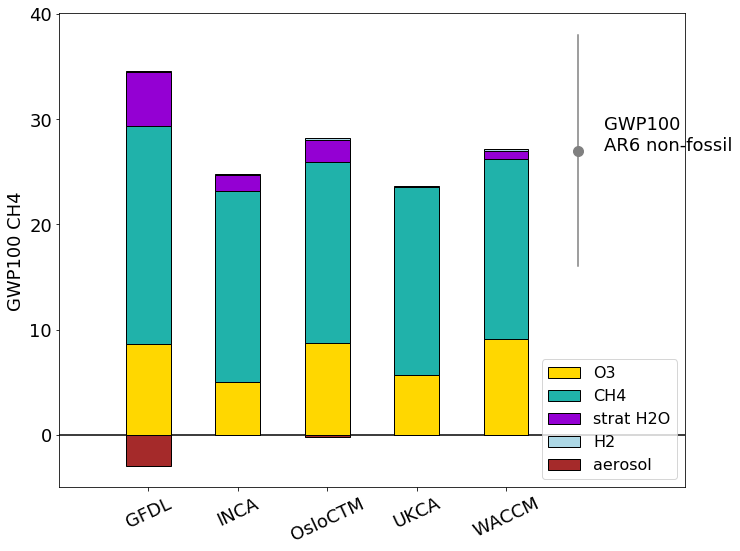

In [10]:
df_table_gwp = df_table_gwp.drop(['OsloCTM-emi','GFDL-emi'],axis=1)

fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(10,8))
df_table_gwp.T.plot.bar(stacked=True,
                        color=[O3_color, CH4_color, H2O_color, H2_color,aerosol_color],
                        #color={"O3": 'C1', "CH4": 'C2',"strat H2O":'C4',"H2":'C5'},
                        edgecolor='black',ax=axs) 
#It is the non-fossil GWP that is relevant to compare to.
#axs.plot([4.8,4.8],[29.8-11 ,29.8+11 ],color='black')
#axs.text(4.4,29.8,'GWP100 \nAR6 fossil')
axs.plot([4.8,4.8],[27.0-11 ,27.0+11 ],color='gray')
axs.plot(4.8,27.0,'o',markersize=10,color='gray')
axs.text(5.1,27.0,'GWP100 \nAR6 non-fossil')
plt.axhline(y=0,color='black',zorder=-10)
plt.xlim([-1,6])
plt.ylabel('GWP100 CH4')
plt.xticks(rotation=25, horizontalalignment="center")
plt.tight_layout()    
plt.savefig('output/CH4_GWP.png', transparent=True)